In [162]:
import numpy as np
import operator
import matplotlib.pyplot as plt


In [163]:
# 构建数据集 
def createDataSet():
    group = np.array([[1,1.1],[1,1],[0,0],[0,0.1]],dtype=np.float16)
    labels = ["A",'A',"B","B"]
    return group , labels

In [164]:
train_x,train_y = createDataSet()

In [165]:
print(train_x)
print(train_x.shape)

[[1.  1.1]
 [1.  1. ]
 [0.  0. ]
 [0.  0.1]]
(4, 2)


In [166]:
train_y

['A', 'A', 'B', 'B']

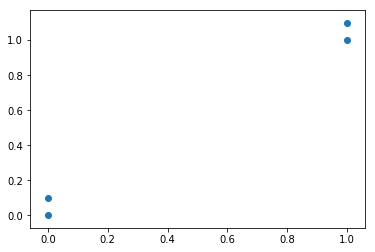

In [167]:
plt.scatter(train_x[:,0],train_x[:,1])
plt.show()

In [168]:
test_x = [0,0]
datasize = train_x.shape[0] # 取出行数
diffMat = np.tile(test_x,(datasize,1)) - train_x  # 使用 np.tile 函数 将 test_x  转变成 一个 行 == 训练集行数 的 矩阵

In [121]:
# np.tile(A,reps)
# 在 行 和 列 上 重复 A 
# np.tile([0,0],（4，1) --》 行4 次 ， 列1次（1次就是不重复）--》 [[0,0],[0,0],[0,0],[0,0]]
np.tile([0,0],[4,1])

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0]])

In [122]:
diffMat  # 得到 test_x 与 训练集 样本点 各特征的 差值

array([[-1.        , -1.09960938],
       [-1.        , -1.        ],
       [ 0.        ,  0.        ],
       [ 0.        , -0.09997559]])

In [123]:
sqrtDiffMat = diffMat**2
sqrtDiffMat

array([[1.        , 1.20914078],
       [1.        , 1.        ],
       [0.        , 0.        ],
       [0.        , 0.00999512]])

In [124]:
sqrtDistance = sqrtDiffMat.sum(axis = 1) # np.array 内置的 sum() axis= 1 行进行 求和 / axis = 0 对列进行求和

In [125]:
distance = np.sqrt(sqrtDistance)
distance

array([1.48631786, 1.41421356, 0.        , 0.09997559])

In [126]:
sortedDistIndices = distance.argsort() # 根据 元素大小 排序 返回 index （从小到大）排列的 数组
sortedDistIndices

array([2, 3, 1, 0])

In [127]:
classCount ={}
k = 3
for i in range(k):
    voteLabel = train_y[sortedDistIndices[i]]
    classCount[voteLabel] = classCount.get(voteLabel,0) +1 


In [128]:
classCount

{'A': 1, 'B': 2}

In [129]:
sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
#  operator.itemgetter(x)  调用 classCount.items() 的 __getitem__() 方法 返回 f(x)
sortedClassCount

[('B', 2), ('A', 1)]

In [130]:
list(map(operator.itemgetter(0),[(1,2),(3,4)])) 

[1, 3]

In [131]:
sortedClassCount[0][0]

'B'

In [237]:
class MyKnnClassifier():
    def __init__(self,n_neighbors,weights ='distance' ):
        self.n_neighbors = n_neighbors
        self.weights = weights
    def fit(self,train_x,train_y):
        assert train_x.shape[0] == len(train_y) # 训练集 数据 和 标签 数量要一致
        self.train_x = train_x
        self.train_y = train_y
    def predict(self,test_x):
        if self.weights == "distance":
            # 计算欧式距离
            diffMatrix = train_x - np.tile(test_x, (train_x.shape[0],1)) # [a0 - b0, a1-b1]
            squarediffMatrix = diffMatrix**2 #[ (a0 - b0)^2, (a1-b1)^2]
            distance = np.sqrt(squarediffMatrix.sum(axis=1)) #   ((a0 - b0)^2 + (a1-b1)^2)^1/2  按行进行 求和 变成 n 行 1 列
            sortDistance = distance.argsort()  # 从小到大 排序 返回index 
        else:
            return None
        self.classCount = {}
        # 取 前K个 标签中 频次最高的 
        for i in range(self.n_neighbors):
            voteLabels = train_y[sortDistance[i]] # 输出 sortDistance 中 第i个元素
            self.classCount[voteLabels] = self.classCount.get(voteLabels,0) + 1
         
        return sorted(self.classCount.items(), key=operator.itemgetter(1),reverse=True)[0][0]
            


In [238]:
test_x = [0,0]
myknn = MyKnnClassifier(3)
myknn.fit(train_x,train_y)
myknn.predict(test_x)

'B'